In [7]:
import torch
import torchvision
from torchvision import datasets, transforms


In [20]:
train = datasets.FashionMNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.FashionMNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

100.0%


Extracting FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNIST\raw



100.0%


Extracting FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNIST\raw



100.0%


Extracting FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNIST\raw



100.0%

Extracting FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNIST\raw



In [21]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1= nn.Linear(28*28, 64)
        self.fc2= nn.Linear(64, 64)
        self.fc3= nn.Linear(64, 64)
        self.fc4= nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x)) 
        x = F.relu(self.fc3(x)) 
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [32]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [33]:
output = net(X)

In [34]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)


EPOCHS= 10

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.4731, grad_fn=<NllLossBackward0>)
tensor(0.0924, grad_fn=<NllLossBackward0>)
tensor(0.1619, grad_fn=<NllLossBackward0>)
tensor(0.2370, grad_fn=<NllLossBackward0>)
tensor(0.6065, grad_fn=<NllLossBackward0>)
tensor(0.0576, grad_fn=<NllLossBackward0>)
tensor(0.7034, grad_fn=<NllLossBackward0>)
tensor(0.6481, grad_fn=<NllLossBackward0>)
tensor(0.0993, grad_fn=<NllLossBackward0>)
tensor(0.1586, grad_fn=<NllLossBackward0>)


In [27]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(f'Accuracy {round(correct/total, 3)}')

Accuracy 0.884


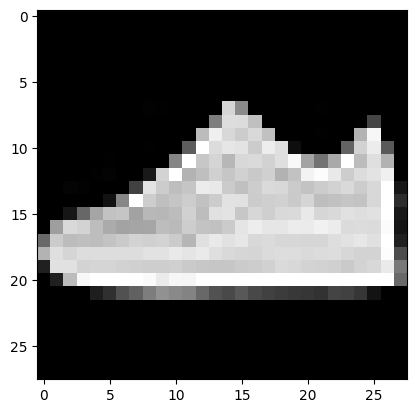

In [39]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28), "gray")
plt.show()

In [40]:
print(torch.argmax(net(X[3].view(-1,28*28))[0]))

tensor(7)
